<a href="https://colab.research.google.com/github/johntango/PS2HouseDataExercise/blob/master/Predict_House_Prices_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# House Sales Data, ETL, Build Predictive Model(linear regression), 
# Assess Model, Deploy Model   'houseSmallData.csv' and "data_description.txt"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### data_description.txt
SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.  
MSSubClass — The building class  
MSZoning — The general zoning classification 
MasVnrArea - Masonary Veneer Area in sq ft
LotFrontage — Linear feet of street connected to property  
LotArea — Lot size in square feet  
Street — Type of road access  
Alley — Type of alley access  
LotShape — General shape of property  
LandContour — Flatness of the property  
Utilities — Type of utilities available  
LotConfig — Lot configuration  

$$Y = X_{1}\beta_{1} + X_{2}\beta_{2} + X_{3}\beta_{3}...$$

In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/jasonteno/pset4/main/train.csv')
data.shape
train = data.iloc[:,:]

train.to_json('housedata.json')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train.shape

(1460, 81)

# New Section

In [8]:
# investigate Sale Price
train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

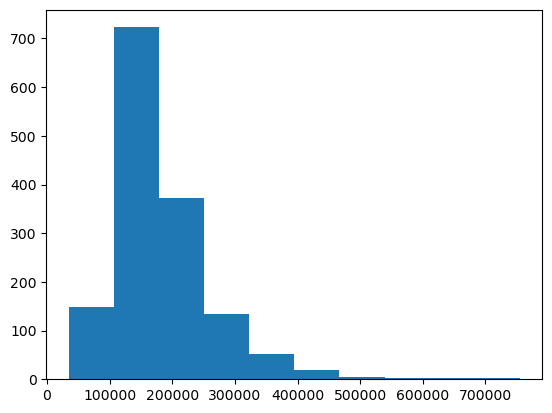

In [9]:
# plot hist
plt.hist(train['SalePrice'])

In [10]:
# select numeric columns
# calculate correlation factor
numeric = train.select_dtypes(include=[np.number])
numeric.shape

(1460, 38)

In [18]:
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:9]
cols

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

In [21]:
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:6].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF'],
      dtype='object')

In [22]:
# pick out X cols and Y = SalePricee
X = train[cols]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF
0,7,1710,2,548,856
1,6,1262,2,460,1262
2,7,1786,2,608,920
3,7,1717,3,642,756
4,8,2198,3,836,1145
...,...,...,...,...,...
1455,6,1647,2,460,953
1456,6,2073,2,500,1542
1457,7,2340,1,252,1152
1458,5,1078,1,240,1078


In [23]:
# buld Linear Regression Model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)

In [24]:
# How good is the model
model.score(X,Y)


0.7611083041001819

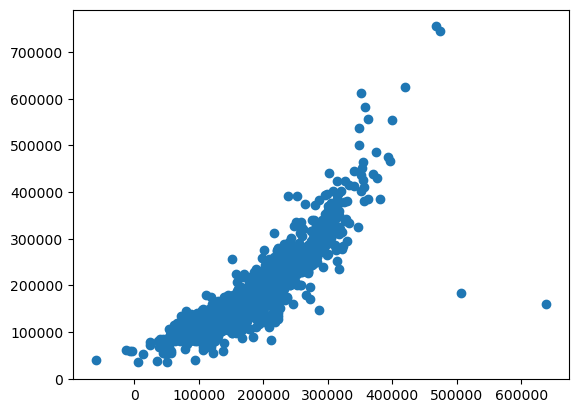

In [25]:
# Scatter plot of predictions
plt.scatter(predictions, Y)

In [28]:
test_data = pd.read_csv('https://raw.githubusercontent.com/jasonteno/pset4/main/test.csv')

In [33]:
test_predict = test_data[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']]

In [35]:
test_predict_table = model.predict(test_predict)
sales_predictions = test_predict_table.tolist()
table = {'Id': test_data.Id, 'SalePrice': sales_predictions}

In [36]:
table

{'Id': 0      1001
 1      1002
 2      1003
 3      1004
 4      1005
        ... 
 455    1456
 456    1457
 457    1458
 458    1459
 459    1460
 Name: Id, Length: 460, dtype: int64,
 'SalePrice': [52774.491020883,
  90449.59809517532,
  268716.5184323706,
  186341.51013627686,
  213892.69645909345,
  114961.64380708721,
  207455.16040201884,
  81629.88929447948,
  236293.87855315724,
  119872.81645152587,
  119308.5239484928,
  94558.43619763039,
  147439.6345400414,
  116982.59099059977,
  144543.10059090247,
  229160.0614972003,
  219229.73080921968,
  228879.1258891515,
  181194.87425732144,
  214196.14403230106,
  119274.91197953868,
  199382.1095901615,
  121709.57757135972,
  213550.02860262102,
  311202.34997902263,
  123869.42873171464,
  153351.10260369693,
  273586.3106834177,
  124348.30189887816,
  138205.72906897063,
  128139.74554847961,
  272688.3145409953,
  303699.58384461433,
  252531.43274308325,
  110000.5888287395,
  53298.19905148927,
  297394.24013716064,
  

In [39]:
test_df = pd.DataFrame(table)
test_df.to_csv("predictions.csv", index=False)